# Classificação de neuroimagens do estudo Haxby 2001 utilizando SVM

## Matheus Ávila - Bolsista de IC

## O que é SVM?

- SVM é uma abreviação para Support Vector Machine, que é um dos muitos classificadores disponíveis para implementar um algoritmo de aprendizagem de máquinas(Machine Learning)


## Esse classificador representa as entradas (inputs) em um plano cartesiano e separa esse mesmo espaço em dois estados: 

- Um lado possui instancias de entrada positivas (1)
- O outro possui instancias de entrada negativas (-1)



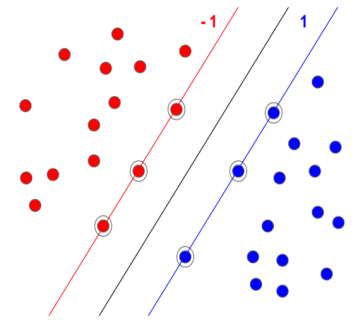

In [4]:
from IPython.display import Image 
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/svmgraphic.png' ))     